In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
data=pd.read_csv("heart_attack_dataset.csv")
data.head(5)

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [4]:
data.isnull().sum()

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data["Outcome"]=data["Outcome"].replace({"No Heart Attack":0,"Heart Attack":1})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_4973/1260316765.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Outcome"]=data["Outcome"].replace({"No Heart Attack":0,"Heart Attack":1})


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

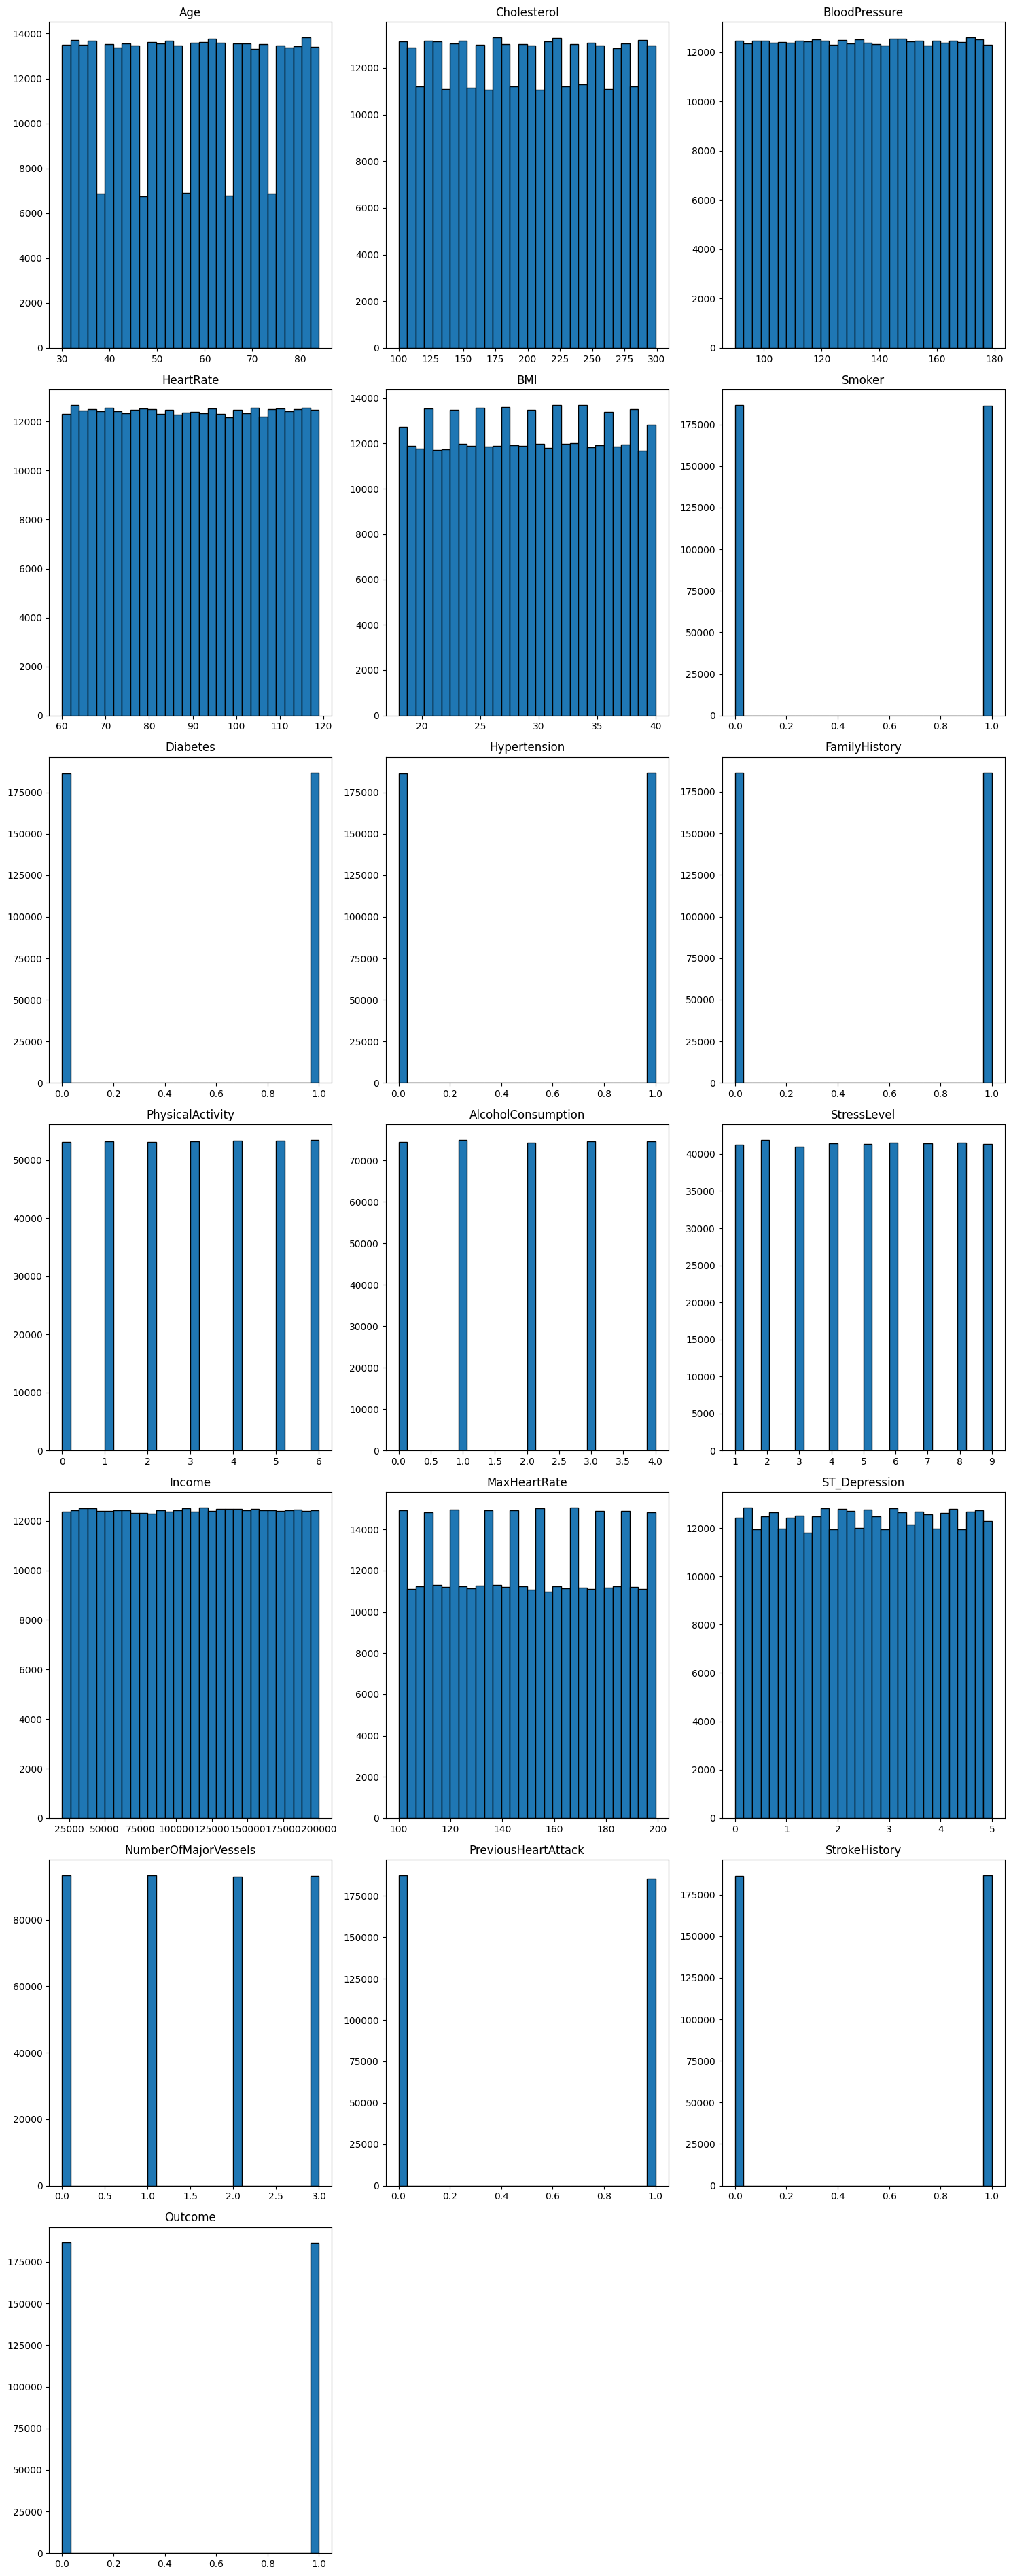

In [11]:
num_features = len(num_col.columns)

# Setting up subplots
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, num_features * 2))
axes = axes.flatten()
for i, col in enumerate(num_col.columns):
    axes[i].hist(num_col[col], bins=30, edgecolor="black")
    axes[i].set_title(col)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

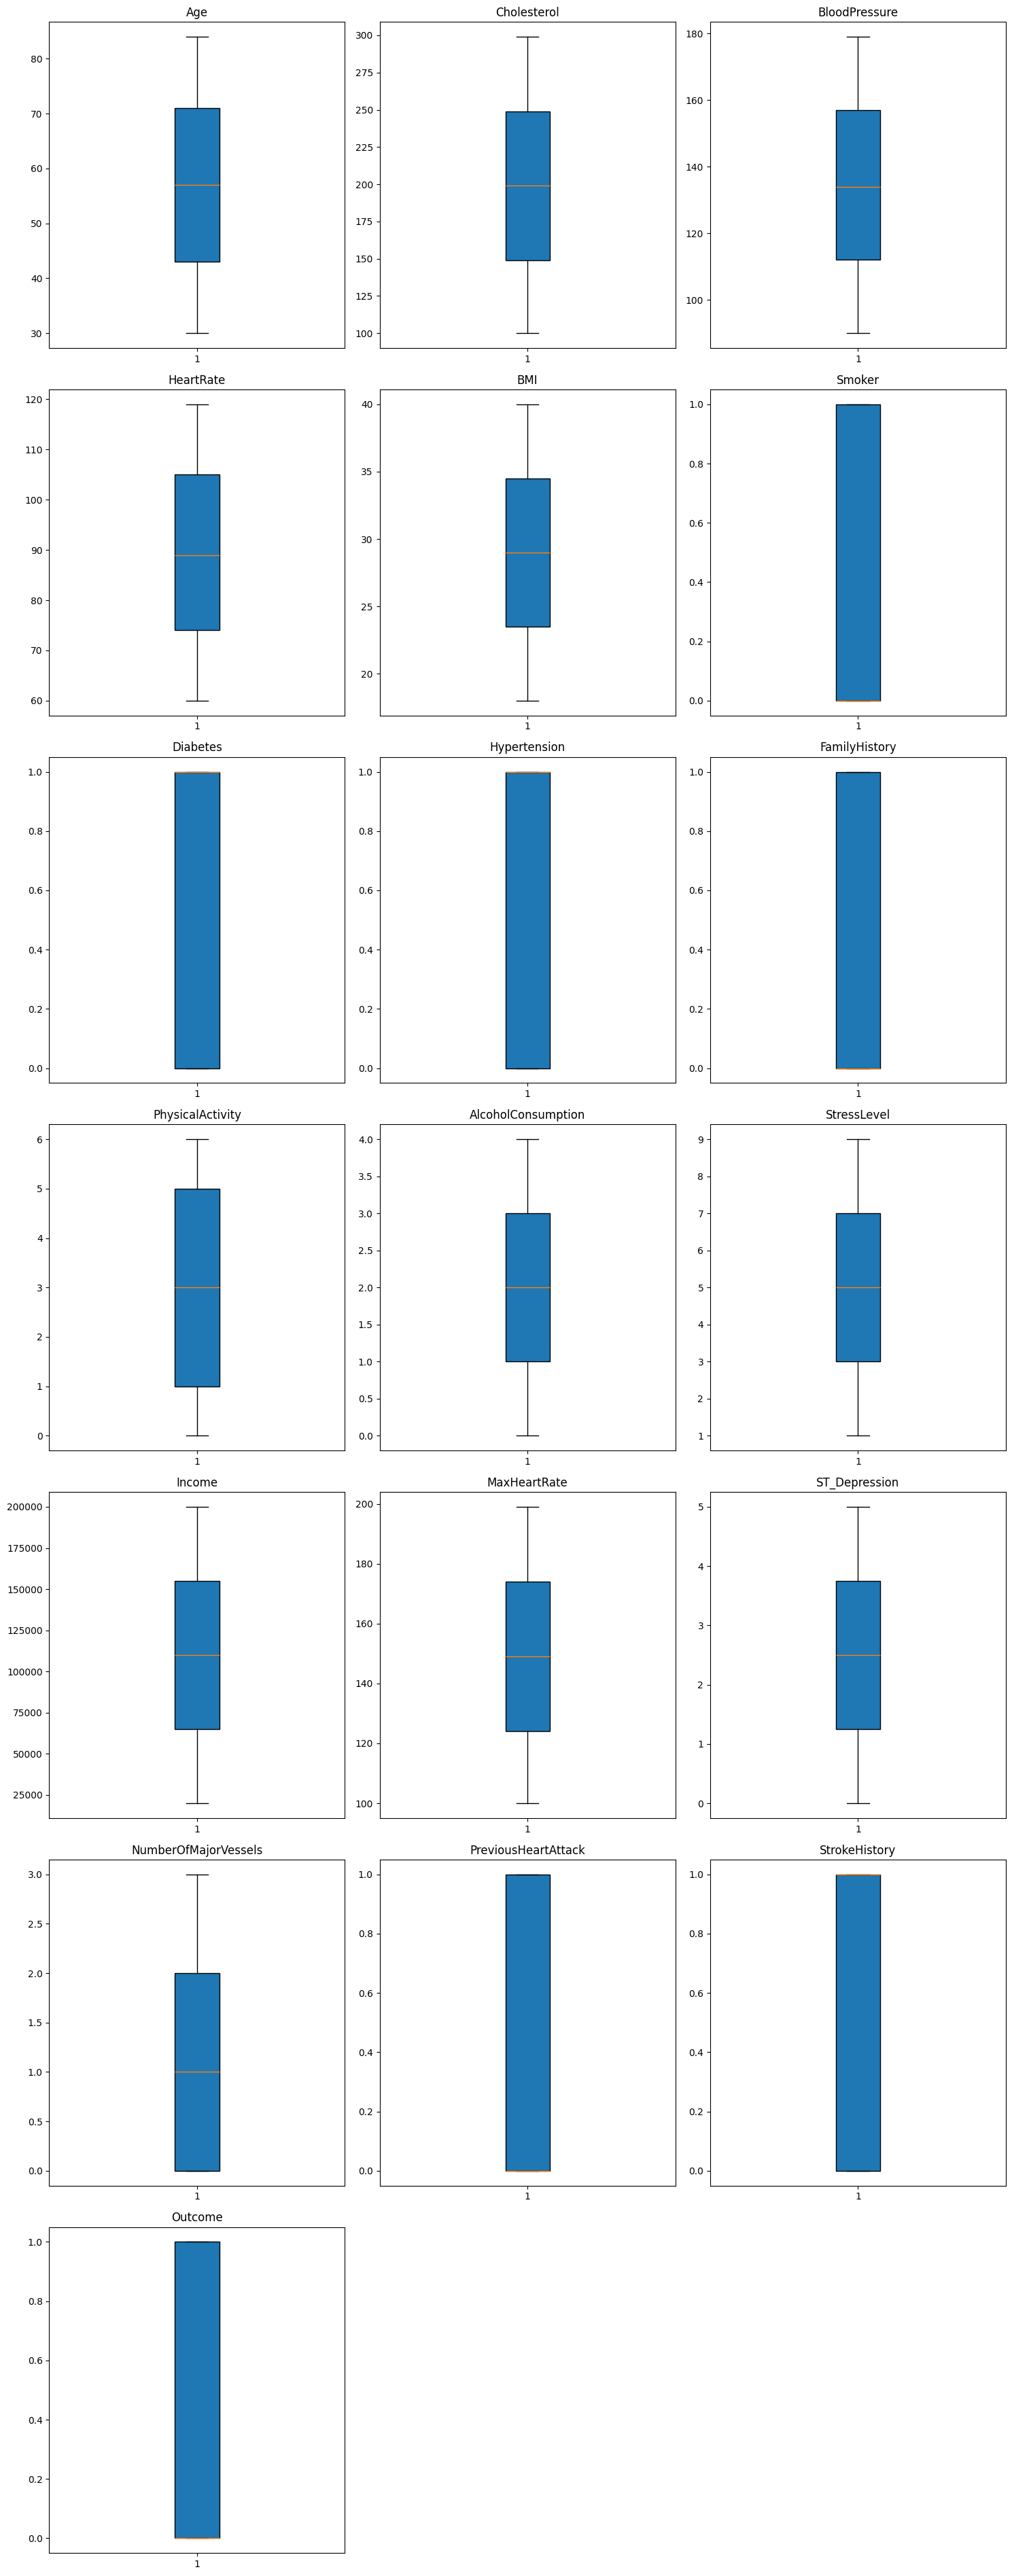

In [13]:
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, num_features * 2))
axes = axes.flatten()

for i, col in enumerate(num_col.columns):
    axes[i].boxplot(num_col[col], patch_artist=True, boxprops=dict(color="black"))
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
obj_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in obj_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le 

In [19]:
data.describe()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,...,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,0.500759,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,...,0.499962,1.000906,1.498525,1.000735,0.496938,0.500815,0.998877,1.002174,1.502552,0.499542
std,15.867016,0.500000,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,...,0.500001,0.816134,1.118003,0.815213,0.499991,0.500000,0.815846,0.816415,1.118210,0.500000
min,30.000000,0.000000,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,0.000000,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,57.000000,1.000000,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,71.000000,1.000000,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000
max,84.000000,1.000000,299.000000,179.000000,119.000000,40.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000


In [21]:
data.corr()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
Age,1.000000,-0.001107,0.004333,0.000662,-0.003064,0.000928,-0.001535,0.000910,-0.000724,8.263232e-04,...,-0.001243,-0.002099,0.001174,0.000327,0.001014,0.001782,0.001881,0.002282,-0.002199,-0.000947
Gender,-0.001107,1.000000,-0.000731,-0.003038,0.001799,0.002980,0.001348,0.001477,0.000571,1.238995e-03,...,-0.002338,0.002870,-0.001423,-0.002336,-0.000677,0.002003,0.000742,-0.001314,0.000826,-0.001892
Cholesterol,0.004333,-0.000731,1.000000,0.003120,0.002186,0.003879,-0.001386,0.001099,-0.001604,-1.822831e-03,...,-0.002812,-0.001953,0.002091,-0.000312,0.001563,-0.002497,-0.002450,-0.001339,-0.000537,-0.001962
BloodPressure,0.000662,-0.003038,0.003120,1.000000,0.000545,-0.001592,0.002798,0.000714,0.001351,-9.447818e-04,...,0.002276,0.000710,0.000615,-0.000954,0.002024,-0.002837,-0.000194,-0.001685,0.002284,0.000496
HeartRate,-0.003064,0.001799,0.002186,0.000545,1.000000,0.000250,0.003537,0.000185,0.000059,5.303721e-04,...,-0.000624,0.000664,-0.000799,0.002739,0.001324,0.000142,0.000832,0.001999,-0.000345,-0.001471
BMI,0.000928,0.002980,0.003879,-0.001592,0.000250,1.000000,0.000547,-0.000206,-0.003841,1.280227e-03,...,0.001594,0.000857,-0.000458,-0.000582,0.000786,0.002550,-0.001215,-0.000298,0.000003,0.000403
Smoker,-0.001535,0.001348,-0.001386,0.002798,0.003537,0.000547,1.000000,-0.000480,-0.002855,-2.279289e-03,...,0.000815,-0.000103,0.001111,0.001245,0.000420,0.003145,-0.001767,-0.001812,0.000565,0.000830
Diabetes,0.000910,0.001477,0.001099,0.000714,0.000185,-0.000206,-0.000480,1.000000,-0.000133,1.416043e-03,...,-0.002386,-0.001283,0.001218,-0.000133,0.000168,-0.003526,0.000394,0.000924,-0.000976,0.000710
Hypertension,-0.000724,0.000571,-0.001604,0.001351,0.000059,-0.003841,-0.002855,-0.000133,1.000000,-4.125120e-04,...,-0.001448,-0.000068,-0.000127,-0.000627,-0.001822,-0.002706,0.002642,-0.000495,0.000058,0.000318
FamilyHistory,0.000826,0.001239,-0.001823,-0.000945,0.000530,0.001280,-0.002279,0.001416,-0.000413,1.000000e+00,...,-0.000043,0.001728,0.000758,0.000283,0.000106,0.000998,-0.000470,0.001423,0.001338,0.000413


In [23]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes Classifier":GaussianNB()
}

In [24]:
x=data.drop(["Outcome"],axis=1)
y=data["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [25]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 49.92171078031831
------------------------------
Model: Decision Tree Classifier
Accuracy: 50.04504311269358
------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: Ada Boost Classifier
Accuracy: 49.65895928960576
------------------------------
Model: Logistic Regression
Accuracy: 50.028956286731585
------------------------------
Model: Gradiant Boosting Classifier
Accuracy: 49.877740122688856
------------------------------
Model: Naive Bayes Classifier
Accuracy: 50.02252155634679
------------------------------


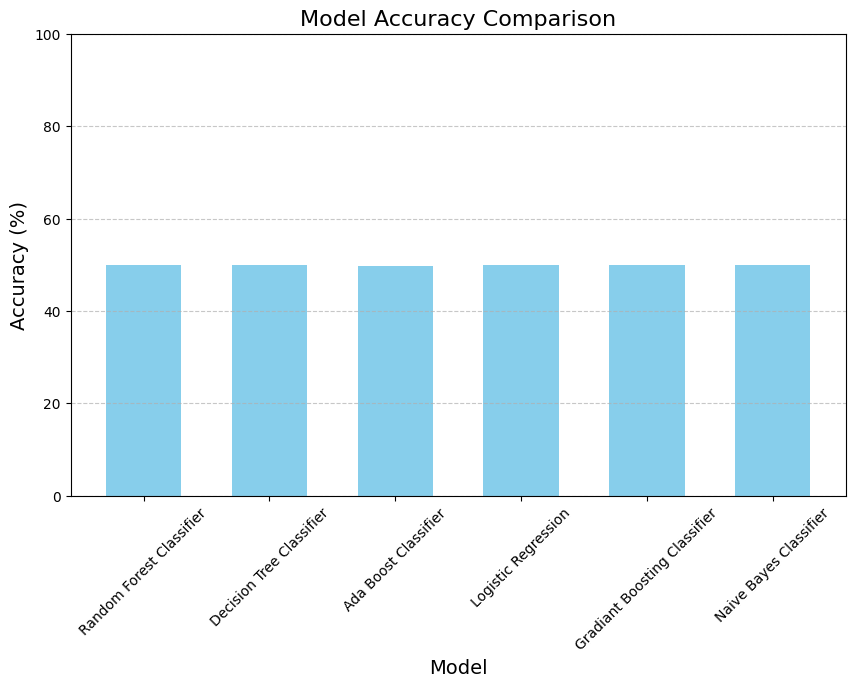

In [26]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue', width=0.6)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()